# Abstract

This project aims to investigate the differences in electroencephalography (EEG) signals between individuals with Alzheimer’s disease (AD) and controls. We used two datapoints from Mitiadous et al. (2023), which contains scalp EEG recordings of AD patients, and healthy controls under eyes-closed rest. In this project, we will first apply signal processing techniques including filtering and artifact rejection remove noise and isolate the frequency range of interest. Our methodology includes the application of the discrete Fourier transform (DFT) to examine spectral components, followed by the computation of power spectral density (PSD) via the Welch method. Through this approach, we aim to quantify the relative band power across different frequency bands, allowing for a detailed comparison of neural activity between the two subjects.

# Exploratory Data Analysis

Below is the dataset description provided by our TA:

>This dataset provides resting-state EEG recordings from individuals with Alzheimer’s disease (AD), frontotemporal dementia (FTD), and healthy controls, collected using a clinical EEG system with 19 scalp electrodes during an eyes-closed resting state. The dataset includes 36 AD patients, 23 FTD patients, and 29 healthy age-matched subjects, with Mini-Mental State Examination (MMSE) scores reported for each. EEG signals were recorded using a monopolar montage, and both raw and preprocessed EEG data are available in BIDS format. Preprocessing involved artifact subspace reconstruction and independent component analysis for denoising. This dataset has high reuse potential for studying EEG-based biomarkers for dementia, brain connectivity alterations, and machine learning applications in neurodegenerative disease diagnosis.
>
>- Two individual EEG data included(Alzheimer’s disease - subject_001, Healthy Control - subject_027)
>- The sampling rate was 500 Hz and the resolution was 10 uV/mm
>- Three channel included: Fp1','Fp2','F3'

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed = 118
F_s = 500

Load in the dataset and transform it into a pandas dataframe.

In [32]:
Control = np.load("./dataset/Control_EEG_sub_027.npy")
AD = np.load("./dataset/AD_EEG_sub_001.npy")

feature_names = ['Fp1', 'Fp2', 'F3']
df_control = pd.DataFrame(Control.T, columns=feature_names)
df_AD = pd.DataFrame(AD.T, columns=feature_names)

df_AD.head()

,Fp1,Fp2,F3
0,-0.000190,-0.000142,-0.000107
1,-0.000180,-0.000137,-0.000100
2,-0.000167,-0.000135,-0.000106
3,-0.000160,-0.000133,-0.000105
4,-0.000159,-0.000124,-0.000104


Since the usual measurement for EEG studies is $\mu V$, we upscale the entire dataset by $10^6$

In [33]:
df_AD *= 1e6
df_control *= 1e6
df_AD.head()

,Fp1,Fp2,F3
0,-189.892563,-141.845688,-107.373039
1,-180.419907,-137.353500,-100.048820
2,-166.992172,-135.058578,-105.761711
3,-160.205063,-132.958969,-105.322258
4,-159.326157,-124.462883,-104.150383


Display the raw EEG data of two subjects.

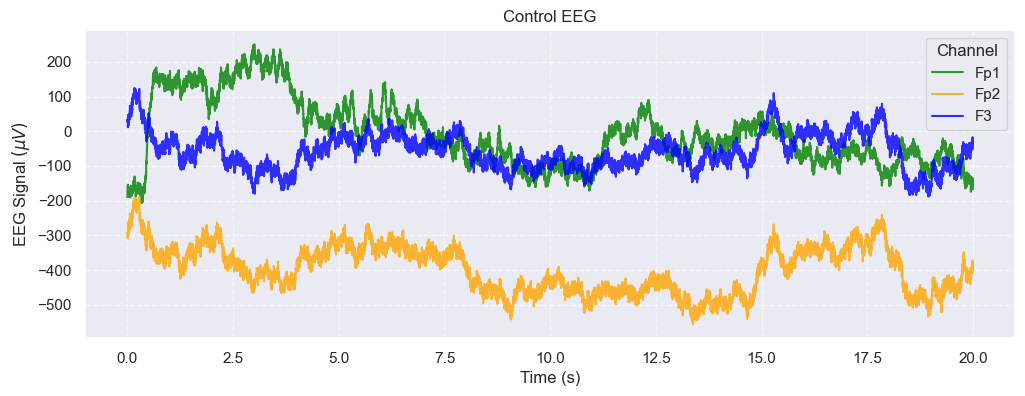

In [34]:
t = df_control.index/F_s

plt.figure(figsize=(12, 4))
plt.plot(t,df_AD["Fp1"], color = "green", label = "Fp1", alpha = 0.8)
plt.plot(t,df_control["Fp2"], color = "orange", label = "Fp2", alpha = 0.8)
plt.plot(t,df_control["F3"], color = "blue", label = "F3", alpha = 0.8)
plt.xlabel('Time (s)')
plt.ylabel(r'EEG Signal $(\mu V)$')
plt.title('Control EEG')
plt.legend(title="Channel")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

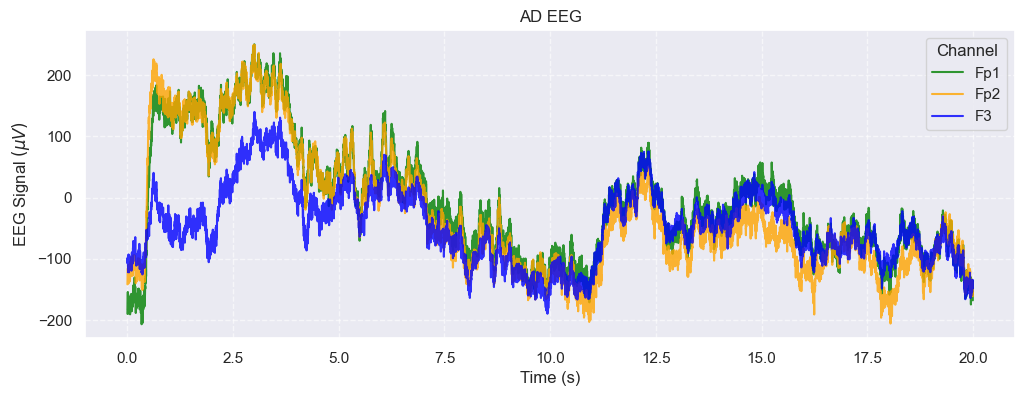

In [35]:
t = df_AD.index/F_s

plt.figure(figsize=(12, 4))
plt.plot(t,df_AD["Fp1"], color = "green", label = "Fp1", alpha = 0.8)
plt.plot(t,df_AD["Fp2"], color = "orange", label = "Fp2", alpha = 0.8)
plt.plot(t,df_AD["F3"], color = "blue", label = "F3", alpha = 0.8)
plt.xlabel('Time (s)')
plt.ylabel(r'EEG Signal $(\mu V)$')
plt.title('AD EEG')
plt.legend(title="Channel")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()